In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
import seaborn as sns 
plt.style.use('ggplot')

df = pd.read_csv('vaers_jan_nov_2021.csv')
pd.options.display.max_columns = 60
df.head()

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916600,Dysphagia,23.1,Epiglottitis,23.1,NaN,NaN,NaN,NaN,NaN,NaN,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA)),01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/28/2020,12/30/2020,2.0,None,PVT,NaN,None,None,None,NaN,NaN,2,01/01/2021,NaN,Y,NaN,Pcn and bee venom
1,916601,Anxiety,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,NaN,NaN,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA)),01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/31/2020,12/31/2020,0.0,NaN,SEN,NaN,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,NaN,2,01/01/2021,NaN,Y,NaN,"""Dairy"""
2,916602,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,NaN,NaN,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,12/31/2020,12/31/2020,0.0,NaN,SEN,NaN,None,None,None,NaN,NaN,2,01/01/2021,NaN,NaN,Y,Shellfish
3,916603,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,NaN,NaN,NaN,NaN,COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA)),01/01/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/23/2020,12/23/2020,0.0,none,WRK,NaN,none,kidney infection,"diverticulitis, mitral valve prolapse, osteoar...","got measles from measel shot, mums from mumps ...",NaN,2,01/01/2021,NaN,NaN,NaN,"Diclofenac, novacaine, lidocaine, pickles, tom..."
4,916604,Injection site erythema,23.1,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,NaN,NaN,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA)),01/01/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,12/22/2020,12/29/2020,7.0,NaN,PUB,NaN,Na,Na,NaN,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,Na


In [2]:
df = df.drop([ "SYMPTOMVERSION1", "SYMPTOMVERSION2", "SYMPTOMVERSION3", "SYMPTOMVERSION4", "SYMPTOMVERSION5", 
              
              "VAX_TYPE", "VAX_LOT", "VAX_SITE", "RECVDATE", "CAGE_YR", "CAGE_MO", "RPT_DATE", "SYMPTOM_TEXT",
              
             "DATEDIED", "ER_VISIT", "HOSPITAL", "HOSPDAYS", "X_STAY", "DISABLE",
              
              "VAX_DATE", "ONSET_DATE", "NUMDAYS", "LAB_DATA", "V_ADMINBY", "V_FUNDBY", "OTHER_MEDS", "PRIOR_VAX", "SPLTTYPE", "FORM_VERS", "TODAYS_DATE", "BIRTH_DEFECT" , "OFC_VISIT",
              
              "ER_ED_VISIT", "ALLERGIES" ], axis = 1)
df.head()

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE,VAX_NAME,STATE,AGE_YRS,SEX,DIED,L_THREAT,RECOVD,CUR_ILL,HISTORY
0,916600,Dysphagia,Epiglottitis,NaN,NaN,NaN,MODERNA,1,IM,COVID19 (COVID19 (MODERNA)),TX,33.0,F,NaN,NaN,Y,None,None
1,916601,Anxiety,Dyspnoea,NaN,NaN,NaN,MODERNA,1,IM,COVID19 (COVID19 (MODERNA)),CA,73.0,F,NaN,NaN,Y,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...
2,916602,Chest discomfort,Dysphagia,Pain in extremity,Visual impairment,NaN,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH)),WA,23.0,F,NaN,NaN,U,None,None
3,916603,Dizziness,Fatigue,Mobility decreased,NaN,NaN,MODERNA,UNK,NaN,COVID19 (COVID19 (MODERNA)),WA,58.0,F,NaN,NaN,Y,kidney infection,"diverticulitis, mitral valve prolapse, osteoar..."
4,916604,Injection site erythema,Injection site pruritus,Injection site swelling,Injection site warmth,NaN,MODERNA,1,IM,COVID19 (COVID19 (MODERNA)),TX,47.0,F,NaN,NaN,N,Na,NaN


In [3]:
# Transform the symptoms dataset so that there is only one column for the symptoms
df_symptoms_m = pd.melt(df, id_vars=['VAERS_ID'], value_vars=['SYMPTOM1', 'SYMPTOM2', 
                                                                'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5'],
                     var_name='NUMBER', value_name='SYMPTOM')
df_symptoms_m.dropna(subset=['SYMPTOM'], inplace=True)


df_symptoms_m.head()

,VAERS_ID,NUMBER,SYMPTOM
0,916600,SYMPTOM1,Dysphagia
1,916601,SYMPTOM1,Anxiety
2,916602,SYMPTOM1,Chest discomfort
3,916603,SYMPTOM1,Dizziness
4,916604,SYMPTOM1,Injection site erythema


In [4]:
# exclude symptoms that are no symptoms (found during research)
no_symptoms = ["SARS-CoV-2 test negative", "Computerised tomogram", "Exposure to SARS-CoV-2",
              "Laboratory test", "Electrocardiogram", "Blood test", "Chest X-ray", 
               "Magnetic resonance imaging", "Full blood count"]
df_symptoms_m = df_symptoms_m[~df_symptoms_m["SYMPTOM"].isin(no_symptoms)]

In [5]:
df = df.drop([ "VAERS_ID", "SYMPTOM1", "SYMPTOM2", "SYMPTOM3", "SYMPTOM4", "SYMPTOM5",], axis = 1)
df.head()

,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE,VAX_NAME,STATE,AGE_YRS,SEX,DIED,L_THREAT,RECOVD,CUR_ILL,HISTORY
0,MODERNA,1,IM,COVID19 (COVID19 (MODERNA)),TX,33.0,F,NaN,NaN,Y,None,None
1,MODERNA,1,IM,COVID19 (COVID19 (MODERNA)),CA,73.0,F,NaN,NaN,Y,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...
2,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH)),WA,23.0,F,NaN,NaN,U,None,None
3,MODERNA,UNK,NaN,COVID19 (COVID19 (MODERNA)),WA,58.0,F,NaN,NaN,Y,kidney infection,"diverticulitis, mitral valve prolapse, osteoar..."
4,MODERNA,1,IM,COVID19 (COVID19 (MODERNA)),TX,47.0,F,NaN,NaN,N,Na,NaN


In [6]:
df = pd.concat([df_symptoms_m, df], axis=1, join='inner')
df.head()

,VAERS_ID,NUMBER,SYMPTOM,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE,VAX_NAME,STATE,AGE_YRS,SEX,DIED,L_THREAT,RECOVD,CUR_ILL,HISTORY
0,916600,SYMPTOM1,Dysphagia,MODERNA,1,IM,COVID19 (COVID19 (MODERNA)),TX,33.0,F,NaN,NaN,Y,None,None
1,916601,SYMPTOM1,Anxiety,MODERNA,1,IM,COVID19 (COVID19 (MODERNA)),CA,73.0,F,NaN,NaN,Y,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...
2,916602,SYMPTOM1,Chest discomfort,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH)),WA,23.0,F,NaN,NaN,U,None,None
3,916603,SYMPTOM1,Dizziness,MODERNA,UNK,NaN,COVID19 (COVID19 (MODERNA)),WA,58.0,F,NaN,NaN,Y,kidney infection,"diverticulitis, mitral valve prolapse, osteoar..."
4,916604,SYMPTOM1,Injection site erythema,MODERNA,1,IM,COVID19 (COVID19 (MODERNA)),TX,47.0,F,NaN,NaN,N,Na,NaN


In [7]:
print(df.shape)

(873488, 15)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873488 entries, 0 to 890835
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   VAERS_ID         873488 non-null  int64  
 1   NUMBER           873488 non-null  object 
 2   SYMPTOM          873488 non-null  object 
 3   VAX_MANU         873488 non-null  object 
 4   VAX_DOSE_SERIES  869833 non-null  object 
 5   VAX_ROUTE        676319 non-null  object 
 6   VAX_NAME         873488 non-null  object 
 7   STATE            778656 non-null  object 
 8   AGE_YRS          802547 non-null  float64
 9   SEX              873488 non-null  object 
 10  DIED             15592 non-null   object 
 11  L_THREAT         21184 non-null   object 
 12  RECOVD           800860 non-null  object 
 13  CUR_ILL          429532 non-null  object 
 14  HISTORY          580340 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 106.6+ MB


# DATA MODELING

In [9]:
def plot_pie(labels, sizes, explode, save_title=None):
    '''Plot pie chart
    
    INPUT:
    labels - labels for wedges
    sizes - wedge sizes
    explode - specifies the fraction of the radius with which to offset each wedge
    save_title - name to save as png
    '''
    fig1, ax1 = plt.subplots()
    
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    if save_title != None:
        path = "C:\\Users\\DELL\\Desktop\\ALL VAERS WORK\\NEW VAERS WORK\\saved images" + save_title
        plt.savefig(path, bbox_inches = "tight")

    plt.show() 

In [10]:
def bar_plot(values, title, save_title=None):
    ''' Plot bar plot
    
    INPUT:
    values - content to plot as pandas series
    title - plot title
    save_title - name to save as png
    '''
    ax = values.plot(kind='bar')
    t = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_title(title)
    if save_title != None:
        path = "C:\\Users\\DELL\\Desktop\\ALL VAERS WORK\\NEW VAERS WORK\\saved images" + save_title
        plt.savefig(path, bbox_inches = "tight")
    
    plt.show()

In [11]:
# relevant values / modifications
all_patients = df["VAERS_ID"].nunique()

pos = "SARS-CoV-2 test positive"
cov_pos_id = df[df["SYMPTOM"] == pos]["VAERS_ID"].unique()

# all patients not tested positive for Covid (excluded starting from Q 1.1)
all_patients_nc = df[~df["VAERS_ID"].isin(cov_pos_id)]["VAERS_ID"].nunique()

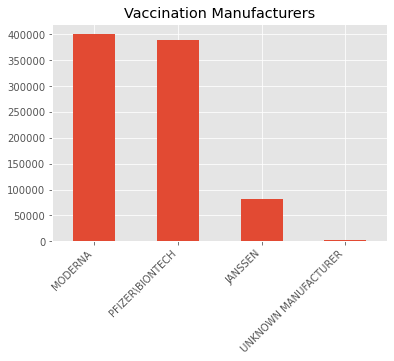

In [12]:
bar_plot(df["VAX_MANU"].value_counts(), "Vaccination Manufacturers")

In [13]:
pfizer = df[df["VAX_MANU"] == "PFIZER\BIONTECH"].shape[0]
moderna = df[df["VAX_MANU"] == "MODERNA"].shape[0]
print("{:.1f} % of the vaccinations are from PFIZER/BIONTECH, {:.1f} % are from MODERNA.".format(
(pfizer/all_patients * 100), (moderna/all_patients * 100)))

62.1 % of the vaccinations are from PFIZER/BIONTECH, 63.9 % are from MODERNA.


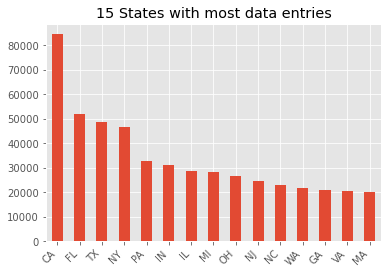

In [14]:
bar_plot(df["STATE"].value_counts()[:15], "15 States with most data entries")

# AGES OVERVIEW

In [15]:
df["AGE_YRS"].describe()

count    802547.000000
mean         50.035821
std          18.587001
min           0.080000
25%          36.000000
50%          50.000000
75%          65.000000
max         119.000000
Name: AGE_YRS, dtype: float64

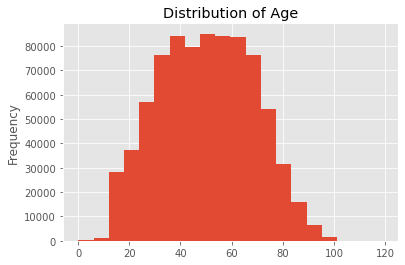

In [16]:
ax = df["AGE_YRS"].plot(kind='hist', bins=20)
ax.set_title("Distribution of Age")
plt.show()

In [17]:
print('The side effects seem to occur most often for patients roughly between 40 and 60')

The side effects seem to occur most often for patients roughly between 40 and 60


# GENDERS OVERVIEW

In [18]:
sex = df["SEX"].value_counts()
ratio_f = sex["F"] / all_patients * 100
ratio_m = sex["M"] / all_patients * 100
ratio_u = sex["U"] / all_patients * 100
ratio_f
print("Ratio Female: {:.1f} %, Ratio Male: {:.1f} %, Ratio Unkown: {:.1f} %".format(ratio_f, ratio_m, ratio_u))

Ratio Female: 96.0 %, Ratio Male: 39.4 %, Ratio Unkown: 3.9 %


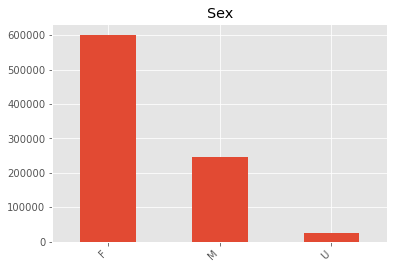

In [19]:
bar_plot(sex, "Sex")

# Which symptoms occur the most after a COVID vaccination ?

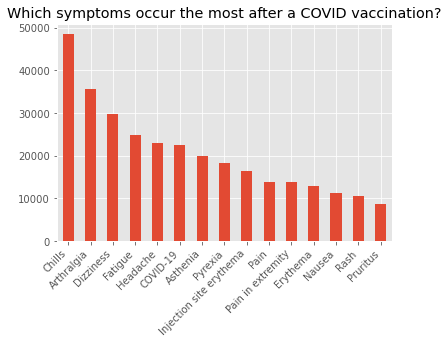

In [20]:
# Out of all symptoms, which ones occur the most?
symptom_values = df["SYMPTOM"].value_counts()
bar_plot(symptom_values[:15], "Which symptoms occur the most after a COVID vaccination?")

# What are the most common symptoms for patients without positive Covid test?

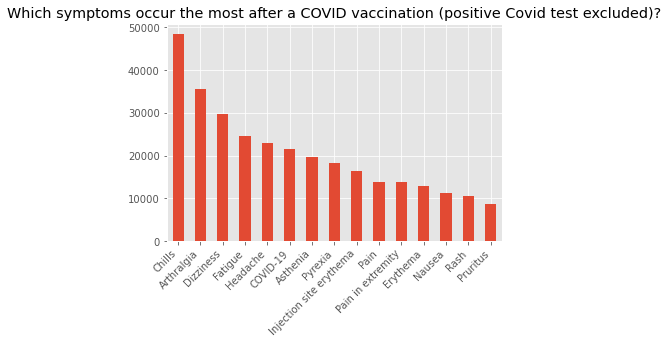

In [21]:
no_covid_symptoms = df[(~df["VAERS_ID"].isin(cov_pos_id))]
no_covid_values = no_covid_symptoms["SYMPTOM"].value_counts()

bar_plot(no_covid_values[:15], "Which symptoms occur the most after a COVID vaccination (positive Covid test excluded)?")

# How many patients were died?

8199 patients died after vaccination.


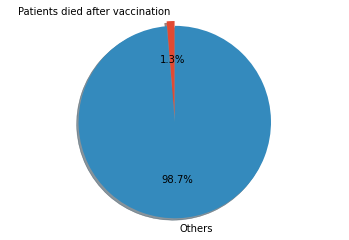

In [22]:
died = df[(df["DIED"] == "Y") &  (~df["VAERS_ID"].isin(cov_pos_id))]
persons_died = died["VAERS_ID"].nunique()
print(persons_died, "patients died after vaccination.")
death_ratio = persons_died / all_patients_nc

labels = 'Patients died after vaccination', 'Others'
sizes = [persons_died, (all_patients_nc-persons_died)]
explode = (0.05, 0)

plot_pie(labels, sizes, explode)

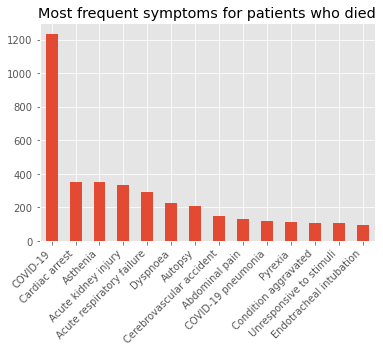

In [23]:
# excluding symptom 0 (which would be "death")
bar_plot(died["SYMPTOM"].value_counts()[1:15], "Most frequent symptoms for patients who died")

# What is the (medical) background of the patients who died?

Of all patients who died,  62.92% (5159 patients) had a history of illness at the time of vaccination.
Of all patients who died,  43.71% (3584 patients) were ill at the time of vaccination.


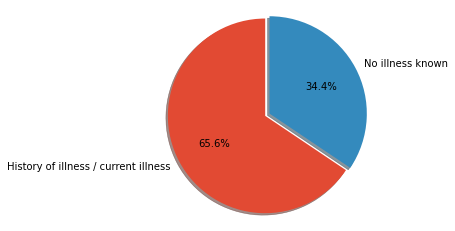

In [24]:
history = died[died["HISTORY"].notnull()]["VAERS_ID"]
illness = died[died["CUR_ILL"].notnull()]["VAERS_ID"]
history_nr = history.nunique()
illness_nr = illness.nunique()

history_illness = pd.concat([history, illness], ignore_index=True, sort=False)
history_illness_nr = history_illness.nunique()


ratio_history_death = history_nr / persons_died * 100
print("Of all patients who died, ", 
      "{:.2f}% ({} patients) had a history of illness at the time of vaccination.".format(ratio_history_death, history_nr)) 

ratio_illness_death = illness_nr / persons_died * 100
print("Of all patients who died, ", 
      "{:.2f}% ({} patients) were ill at the time of vaccination.".format(ratio_illness_death, illness_nr)) 


labels = 'History of illness / current illness', 'No illness known'
sizes = [history_illness_nr, (persons_died-history_illness_nr)]
explode = (0.05, 0)

plot_pie(labels, sizes, explode) # Krankheiten value_counts

In [25]:
# comparison: percentages for history of illness for all patients 
history_all = df[(df["HISTORY"].notnull()) & (~df["VAERS_ID"].isin(cov_pos_id))]["VAERS_ID"]
illness_all = df[(df["CUR_ILL"].notnull()) & (~df["VAERS_ID"].isin(cov_pos_id))]["VAERS_ID"]

history_nr_all = history_all.nunique()
illness_nr_all = illness_all.nunique()

history_illness_all = pd.concat([history_all, illness_all], ignore_index=True, sort=False)
history_illness_nr_all = history_illness_all.nunique()

ratio_history_all = history_nr_all / all_patients_nc * 100
print("Of all patients who died, ", 
      "{:.2f}% ({} patients) had a history of illness at the time of vaccination.".format(ratio_history_all, history_nr_all)) 

ratio_illness_all = illness_nr_all / all_patients_nc * 100
print("Of all patients who died, ", 
      "{:.2f}% ({} patients) were ill at the time of vaccination.".format(ratio_illness_all, illness_nr))

Of all patients who died,  62.07% (387963 patients) had a history of illness at the time of vaccination.
Of all patients who died,  45.45% (3584 patients) were ill at the time of vaccination.


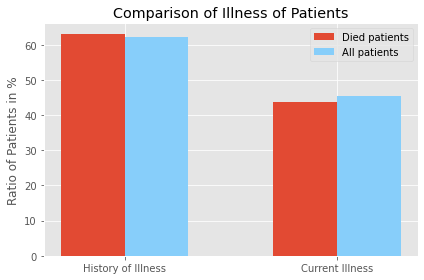

In [26]:
labels = ['History of Illness', 'Current Illness']
died_values = [ratio_history_death, ratio_illness_death]
all_values = [ratio_history_all, ratio_illness_all]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, died_values, width, label='Died patients')
rects2 = ax.bar(x + width/2, all_values, width, label='All patients', color="lightskyblue")

ax.set_ylabel('Ratio of Patients in %')
ax.set_title('Comparison of Illness of Patients')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

In [27]:
df = df.drop(["HISTORY", "CUR_ILL"], axis = 1)
df

,VAERS_ID,NUMBER,SYMPTOM,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE,VAX_NAME,STATE,AGE_YRS,SEX,DIED,L_THREAT,RECOVD
0,916600,SYMPTOM1,Dysphagia,MODERNA,1,IM,COVID19 (COVID19 (MODERNA)),TX,33.0,F,NaN,NaN,Y
1,916601,SYMPTOM1,Anxiety,MODERNA,1,IM,COVID19 (COVID19 (MODERNA)),CA,73.0,F,NaN,NaN,Y
2,916602,SYMPTOM1,Chest discomfort,PFIZER\BIONTECH,1,IM,COVID19 (COVID19 (PFIZER-BIONTECH)),WA,23.0,F,NaN,NaN,U
3,916603,SYMPTOM1,Dizziness,MODERNA,UNK,NaN,COVID19 (COVID19 (MODERNA)),WA,58.0,F,NaN,NaN,Y
4,916604,SYMPTOM1,Injection site erythema,MODERNA,1,IM,COVID19 (COVID19 (MODERNA)),TX,47.0,F,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
890831,1845800,SYMPTOM1,Urinary tract infection,PFIZER\BIONTECH,3,IM,COVID19 (COVID19 (PFIZER-BIONTECH)),MI,65.0,F,NaN,NaN,Y
890832,1845801,SYMPTOM1,Chest discomfort,PFIZER\BIONTECH,2,UN,COVID19 (COVID19 (PFIZER-BIONTECH)),VA,40.0,F,NaN,NaN,N
890833,1845802,SYMPTOM1,Device connection issue,MODERNA,3,IM,COVID19 (COVID19 (MODERNA)),FL,53.0,M,NaN,NaN,Y
890834,1845803,SYMPTOM1,Fatigue,PFIZER\BIONTECH,2,IM,COVID19 (COVID19 (PFIZER-BIONTECH)),PA,27.0,F,NaN,NaN,U


# Data Cleaning

In [28]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [29]:
df['DIED']= label_encoder.fit_transform(df['DIED'])
df['L_THREAT']= label_encoder.fit_transform(df['L_THREAT'])

print(df['DIED'].unique())
print(df['L_THREAT'].unique())

[1 0]
[1 0]


In [30]:
df = df[df['VAX_NAME'] != 'COVID19 (COVID19 (UNKNOWN))']

df = df[df['VAX_DOSE_SERIES'] != 'UNK']
df = df[df['SEX'] != 'U']
df = df[df['RECOVD'] != 'U']

In [31]:
df['SEX']= label_encoder.fit_transform(df['SEX'])
print(df['SEX'].unique())

[0 1]


In [32]:
df['VAX_NAME']= label_encoder.fit_transform(df['VAX_NAME'])
print(df['VAX_NAME'].unique())

[1 2 0]


In [33]:
df['RECOVD']= label_encoder.fit_transform(df['RECOVD'])
df['RECOVD'].unique()

array([1, 0, 2])

In [34]:
df = df.drop(['VAERS_ID', 'VAX_MANU'], axis=1)
df = df.dropna()
 
# To reset the indices
df = df.reset_index(drop = True)
 
# Print the dataframe
df.shape

(453115, 11)

In [35]:
df.drop_duplicates(keep=False,inplace=True)
df.shape

(389480, 11)

In [36]:
df.head()

,NUMBER,SYMPTOM,VAX_DOSE_SERIES,VAX_ROUTE,VAX_NAME,STATE,AGE_YRS,SEX,DIED,L_THREAT,RECOVD
0,SYMPTOM1,Dysphagia,1,IM,1,TX,33.0,0,1,1,1
3,SYMPTOM1,Pharyngeal swelling,1,IM,1,NV,44.0,0,1,1,1
4,SYMPTOM1,Diarrhoea,1,IM,1,OH,33.0,1,1,1,2
5,SYMPTOM1,Vaccination site erythema,1,IM,1,TN,71.0,0,1,1,0
6,SYMPTOM1,Rash,1,SYR,1,VA,18.0,0,1,1,0


In [37]:
df['VAX_DOSE_SERIES'].unique()

array(['1', '3', '2', '5', '4', '7+', '6'], dtype=object)

In [38]:
df['VAX_DOSE_SERIES'] = df['VAX_DOSE_SERIES'].map({'1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7})

df['NUMBER'] = df['NUMBER'].map({'SYMPTOM1':1, 'SYMPTOM2':2, 'SYMPTOM3':3, 'SYMPTOM4':4, 'SYMPTOM5':5})

In [39]:
df['VAX_ROUTE'].unique()

array(['IM', 'SYR', 'JET', 'UN', 'SC', 'OT', 'ID', 'PO', 'IN'],
      dtype=object)

In [40]:
df['VAX_ROUTE'] = df['VAX_ROUTE'].map({'IM':1, 'SYR':2, 'JET':3, 'UN':4, 'SC':5, 'OT':6, 'ID':7, 'PO':8, 'IN':9})

In [41]:
df['STATE'].unique()

array(['TX', 'NV', 'OH', 'TN', 'VA', 'NC', 'NY', 'GA', 'NJ', 'LA', 'IL',
       'MD', 'ME', 'MA', 'MI', 'CT', 'OK', 'AR', 'ID', 'IN', 'FL', 'PA',
       'AZ', 'MN', 'MO', 'CO', 'UT', 'WA', 'CA', 'AL', 'NE', 'RI', 'MS',
       'IA', 'KS', 'HI', 'MT', 'WI', 'PR', 'WV', 'ND', 'SC', 'VT', 'NM',
       'KY', 'SD', 'NH', 'OR', 'WY', 'AK', 'DE', 'XB', 'DC', 'VI', 'AS',
       'MP', 'GU', 'MH', 'FM', 'XL', 'XV'], dtype=object)

In [42]:
df['STATE'] = df['STATE'].map({'TX':1, 'NV':2, 'OH':3, 'TN':4, 'VA':5, 'NC':6, 'NY':7, 'GA':8, 'NJ':9, 'LA':10, 'IL':11,
       'MD':12, 'ME':13, 'MA':14, 'MI':15, 'CT':16, 'OK':17, 'AR':18, 'ID':19, 'IN':20, 'FL':21, 'PA':22,
       'AZ':23, 'MN':24, 'MO':25, 'CO':26, 'UT':27, 'WA':28, 'CA':29, 'AL':30, 'NE':31, 'RI':32, 'MS':33,
       'IA':34, 'KS':35, 'HI':36, 'MT':37, 'WI':38, 'PR':39, 'WV':40, 'ND':41, 'SC':42, 'VT':43, 'NM':44,
       'KY':45, 'SD':46, 'NH':47, 'OR':48, 'WY':49, 'AK':50, 'DE':51, 'XB':52, 'DC':53, 'VI':54, 'AS':55,
       'MP':56, 'GU':57, 'MH':58, 'FM':59, 'XL':60, 'XV':61})

In [43]:
df['SYMPTOM'].nunique()

5647

In [44]:
# exclude symptoms with occurence < 20
symp_counts = df["SYMPTOM"].value_counts()
symp_counts

Chills                                     16477
Arthralgia                                 13957
Dizziness                                  10475
Fatigue                                     9848
Headache                                    8979
                                           ...  
Umbilical hernia                               1
Blood folate increased                         1
Faecaloma                                      1
Hormone receptor positive breast cancer        1
Bickerstaff's encephalitis                     1
Name: SYMPTOM, Length: 5647, dtype: int64

In [45]:
df = df.loc[df["SYMPTOM"].isin(symp_counts.index[symp_counts >= 20])]

In [46]:
df.shape

(371416, 11)

In [47]:
# one_hot_encoded_data = pd.get_dummies(df, columns = ['SYMPTOM'])
# print(one_hot_encoded_data)
df['SYMPTOM']= label_encoder.fit_transform(df['SYMPTOM'])

In [48]:
df = df.dropna()
df = df.reset_index(drop = True)
df.drop_duplicates(keep=False,inplace=True)
df.shape

(371224, 11)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371224 entries, 0 to 371223
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   NUMBER           371224 non-null  int64  
 1   SYMPTOM          371224 non-null  int32  
 2   VAX_DOSE_SERIES  371224 non-null  float64
 3   VAX_ROUTE        371224 non-null  int64  
 4   VAX_NAME         371224 non-null  int32  
 5   STATE            371224 non-null  int64  
 6   AGE_YRS          371224 non-null  float64
 7   SEX              371224 non-null  int32  
 8   DIED             371224 non-null  int32  
 9   L_THREAT         371224 non-null  int32  
 10  RECOVD           371224 non-null  int32  
dtypes: float64(2), int32(6), int64(3)
memory usage: 25.5 MB


<function matplotlib.pyplot.show(close=None, block=None)>

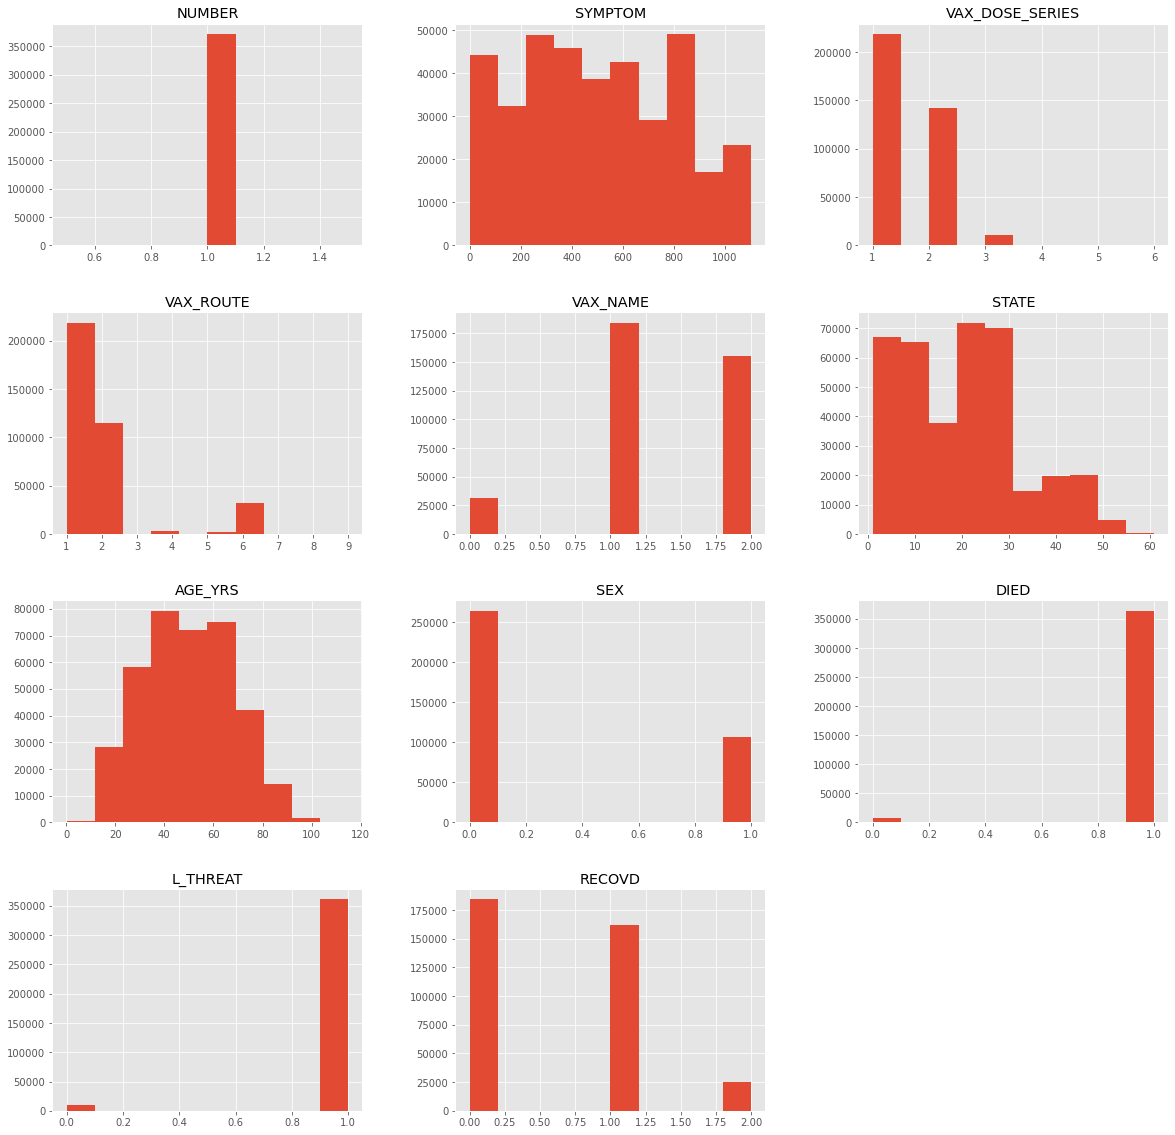

In [50]:
#ploting the histogram of each parameter
df.hist(figsize = (20,20))
plt.show

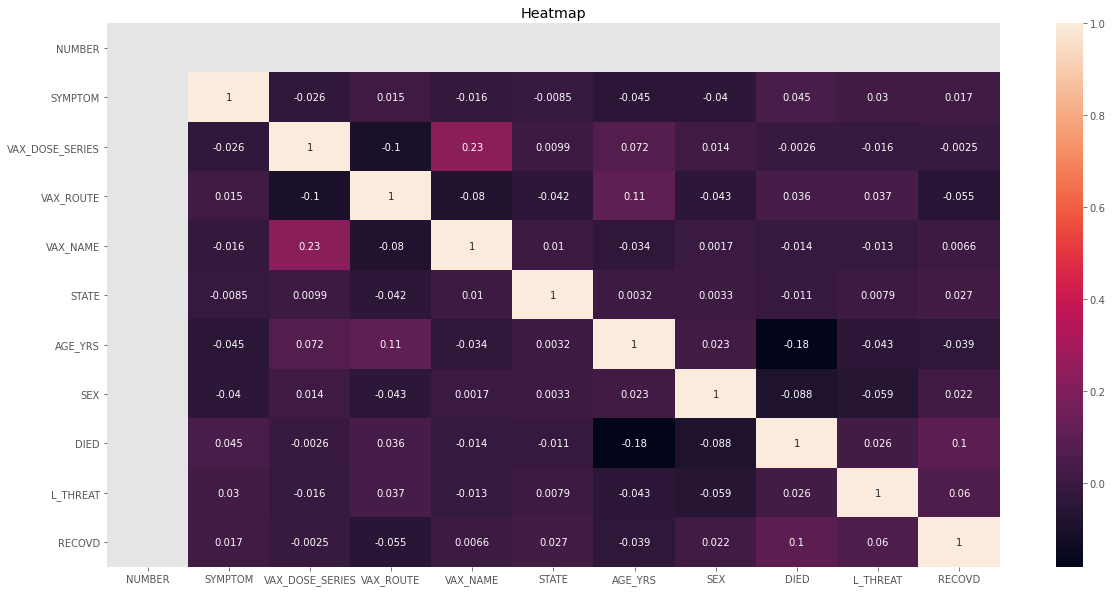

In [51]:
plt.figure(figsize=(20,10))
plt.title('Heatmap')
sns.heatmap(df.corr(), annot=True);

In [52]:
df.head()

,NUMBER,SYMPTOM,VAX_DOSE_SERIES,VAX_ROUTE,VAX_NAME,STATE,AGE_YRS,SEX,DIED,L_THREAT,RECOVD
0,1,389,1.0,1,1,1,33.0,0,1,1,1
1,1,825,1.0,1,1,2,44.0,0,1,1,1
2,1,366,1.0,1,1,3,33.0,1,1,1,2
3,1,1053,1.0,1,1,4,71.0,0,1,1,0
4,1,881,1.0,2,1,5,18.0,0,1,1,0


# Data spliting and scaling

In [53]:
X = df.drop(['DIED'], axis=1)
Y = df['DIED']

In [54]:
Y.value_counts()

1    363491
0      7733
Name: DIED, dtype: int64

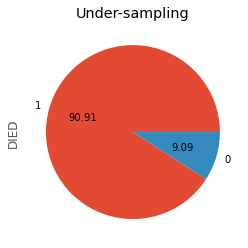

In [55]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.1)
X, Y = rus.fit_resample(X, Y)

ax = Y.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [56]:
Y.value_counts()

1    77330
0     7733
Name: DIED, dtype: int64

In [57]:
X.shape

(85063, 10)

In [58]:
Y.shape

(85063,)

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=32)

# Buildind and fitting models

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import balanced_accuracy_score , recall_score, precision_score, confusion_matrix

In [61]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(32)
    
    model_scores = {}

    
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
        


    model_scores = pd.DataFrame(model_scores, index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score')
    
   
       
    return model_scores

In [62]:
models = {'LogisticRegression': LogisticRegression(max_iter=10000),
          'KNeighborsClassifier': KNeighborsClassifier(),
          'SVC': SVC(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'AdaBoostClassifier': AdaBoostClassifier(),
          'GradientBoostingClassifier': GradientBoostingClassifier(),
          'XGBClassifier': XGBClassifier(),
          'XGBRFClassifier': XGBRFClassifier(),
          'LGBMClassifier':LGBMClassifier()}

In [63]:
baseline_model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

[03:56:54] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:56:57] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [64]:
baseline_model_scores

,Score
LogisticRegression,0.926586
KNeighborsClassifier,0.928055
SVC,0.928995
DecisionTreeClassifier,0.934109
XGBRFClassifier,0.936931
AdaBoostClassifier,0.942279
GradientBoostingClassifier,0.948804
RandomForestClassifier,0.951743
LGBMClassifier,0.953800
XGBClassifier,0.960207


# Reacall Scores

In [65]:
def my_recall_score(models, X_train, X_test, y_train, y_test):
   
    y_pred = {}
    rec = {}
    
    for name, model in models.items():
#         model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        confusionmatrix = confusion_matrix(y_test, y_pred)
        rec[name] = recall_score(y_test, y_pred)


   
    
    rec = pd.DataFrame(rec, index=['Recall']).transpose()
    rec = rec.sort_values('Recall')
    

        
    return rec

In [66]:
baseline_model_recall_scores = my_recall_score(models, X_train, X_test, y_train, y_test)

In [67]:
baseline_model_recall_scores

,Recall
DecisionTreeClassifier,0.961083
KNeighborsClassifier,0.973127
RandomForestClassifier,0.984848
LogisticRegression,0.985171
AdaBoostClassifier,0.985495
XGBRFClassifier,0.985625
XGBClassifier,0.986855
LGBMClassifier,0.987114
GradientBoostingClassifier,0.988085
SVC,0.988409


# precision Scores

In [68]:
def my_precision_score(models, X_train, X_test, y_train, y_test):
   
    y_pred = {}
    pre = {}
    
    for name, model in models.items():
#         model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        pre[name] = precision_score(y_pred, y_test)


   
    
    pre = pd.DataFrame(pre, index=['precision']).transpose()
    pre = pre.sort_values('precision')
 

        
    return pre

In [69]:
baseline_model_precision_scores = my_precision_score(models, X_train, X_test, y_train, y_test)

In [70]:
baseline_model_precision_scores

,precision
DecisionTreeClassifier,0.961083
KNeighborsClassifier,0.973127
RandomForestClassifier,0.984848
LogisticRegression,0.985171
AdaBoostClassifier,0.985495
XGBRFClassifier,0.985625
XGBClassifier,0.986855
LGBMClassifier,0.987114
GradientBoostingClassifier,0.988085
SVC,0.988409


# F1 Scores

In [71]:
def my_fone_score(models, X_train, X_test, y_train, y_test):
   
    y_pred = {}
    fone = {}
    
    for name, model in models.items():
#         model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        fone[name] = f1_score(y_test, y_pred)


   
    
    fone = pd.DataFrame(fone, index=['f1_score']).transpose()
    fone = fone.sort_values('f1_score')
 

        
    return fone

In [72]:
baseline_model_fone_scores = my_fone_score(models, X_train, X_test, y_train, y_test)

In [73]:
baseline_model_fone_scores

,f1_score
LogisticRegression,0.960571
KNeighborsClassifier,0.960870
SVC,0.961936
DecisionTreeClassifier,0.963610
XGBRFClassifier,0.965953
AdaBoostClassifier,0.968746
GradientBoostingClassifier,0.972251
RandomForestClassifier,0.973719
LGBMClassifier,0.974867
XGBClassifier,0.978271


# Confusion matrix

In [74]:
def my_recall_score(models, X_train, X_test, y_train, y_test):
   
    y_pred = {}
    rec = {}
    
    for name, model in models.items():
        y_pred = model.predict(X_test)
        LABELS = ['DIED', 'NOT_DIED']
        confusionmatrix = confusion_matrix(y_test, y_pred)
        plt.figure(figsize =(10, 10))
        sns.heatmap(confusionmatrix, xticklabels = LABELS,yticklabels = LABELS, annot = True, fmt ="d");  
        plt.title("Confusion matrix") 
        plt.ylabel('True class') 
        plt.xlabel('Predicted class')
        plt.show()

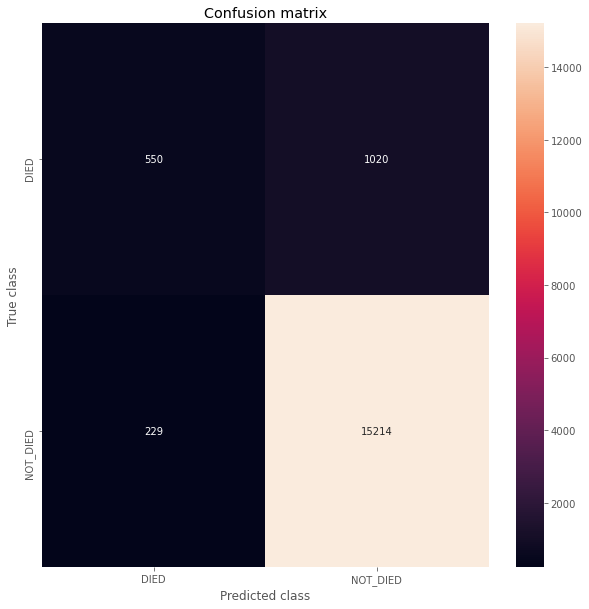

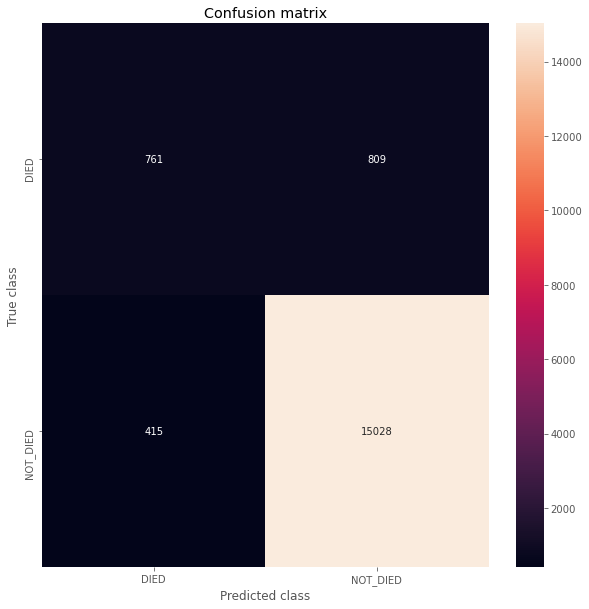

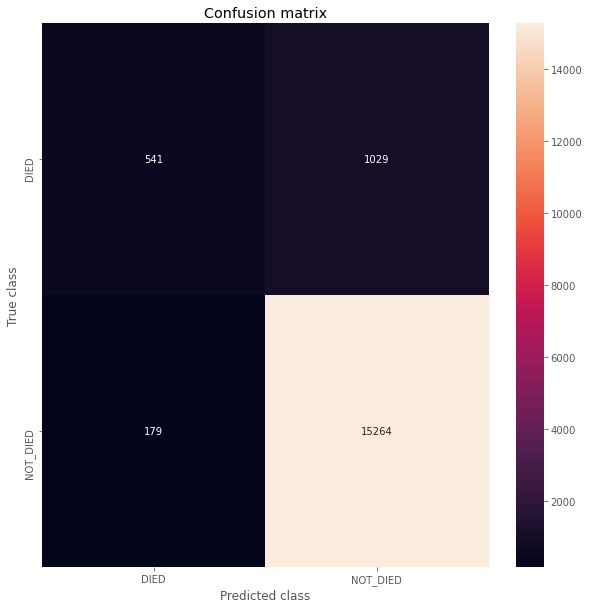

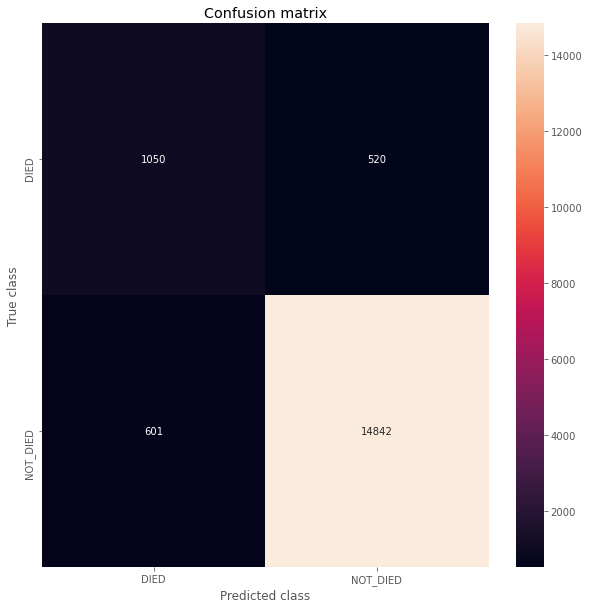

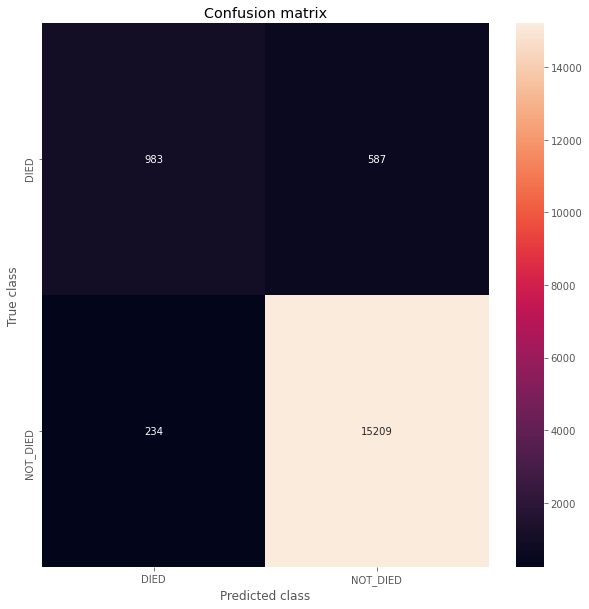

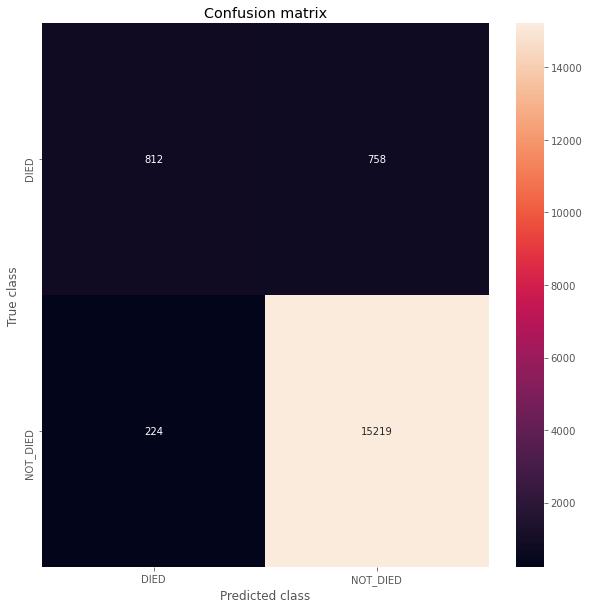

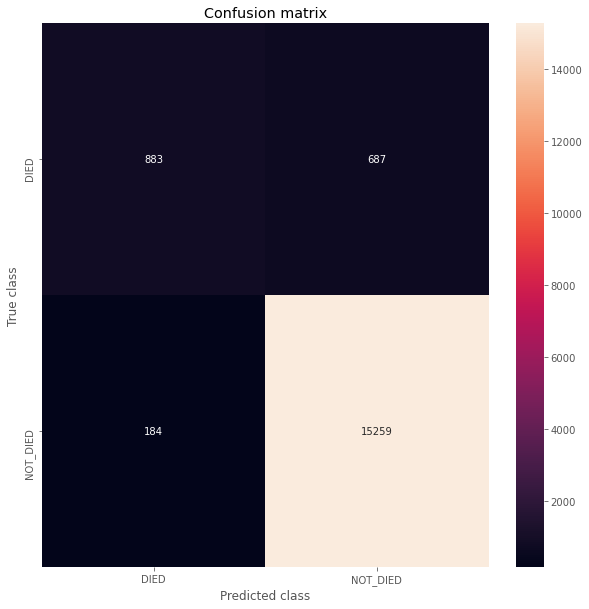

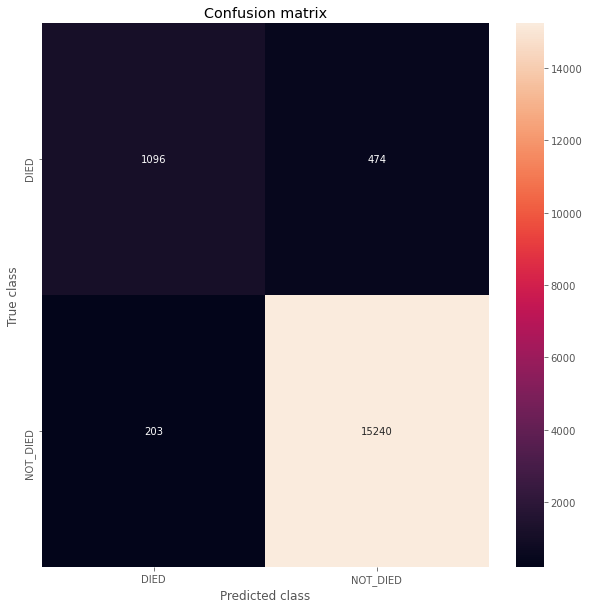

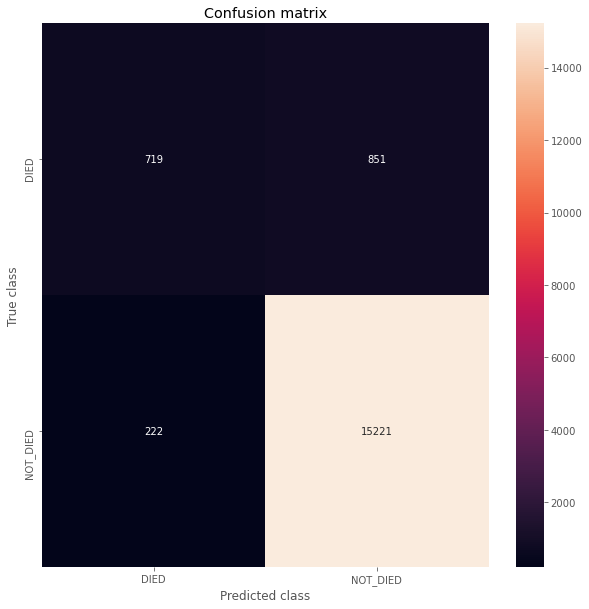

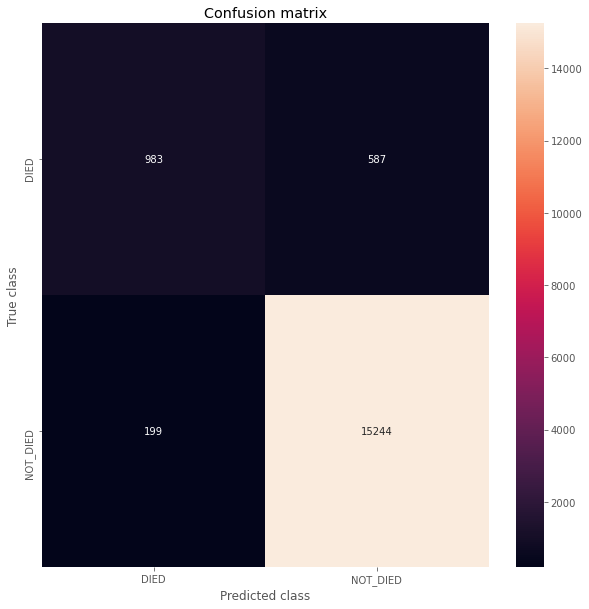

In [75]:
baseline_model_conmat = my_recall_score(models, X_train, X_test, y_train, y_test)

# Learning Curves

In [76]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score

In [77]:
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(), X, Y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))

In [78]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

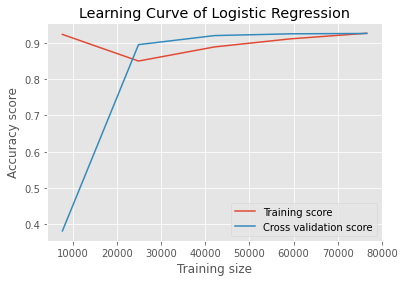

In [79]:
plt.plot(train_sizes, train_mean, label = 'Training score')
plt.plot(train_sizes, test_mean, label = 'Cross validation score')

plt.title('Learning Curve of Logistic Regression')
plt.xlabel('Training size')
plt.ylabel('Accuracy score')
plt.legend(loc ='best')

In [80]:
train_sizes, train_scores, test_scores = learning_curve(DecisionTreeClassifier(), X, Y, cv=30, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))

In [81]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

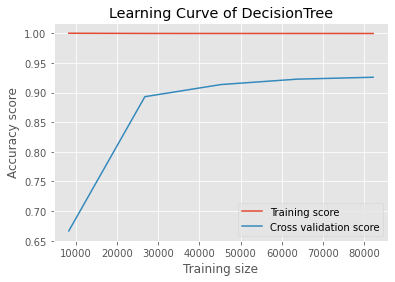

In [82]:
plt.plot(train_sizes, train_mean, label = 'Training score')
plt.plot(train_sizes, test_mean, label = 'Cross validation score')

plt.title('Learning Curve of DecisionTree')
plt.xlabel('Training size')
plt.ylabel('Accuracy score')
plt.legend(loc ='best')

In [83]:
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), X, Y, cv=30, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))

In [84]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

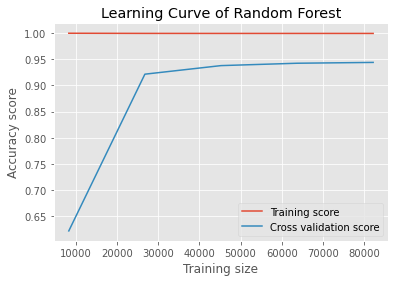

In [85]:
plt.plot(train_sizes, train_mean, label = 'Training score')
plt.plot(train_sizes, test_mean, label = 'Cross validation score')

plt.title('Learning Curve of Random Forest')
plt.xlabel('Training size')
plt.ylabel('Accuracy score')
plt.legend(loc ='best')

In [86]:
train_sizes, train_scores, test_scores = learning_curve(AdaBoostClassifier(), X, Y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))

In [87]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

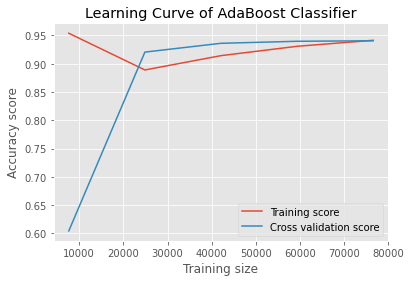

In [88]:
plt.plot(train_sizes, train_mean, label = 'Training score')
plt.plot(train_sizes, test_mean, label = 'Cross validation score')

plt.title('Learning Curve of AdaBoost Classifier')
plt.xlabel('Training size')
plt.ylabel('Accuracy score')
plt.legend(loc ='best')

In [89]:
train_sizes, train_scores, test_scores = learning_curve(GradientBoostingClassifier(), X, Y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))

In [90]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

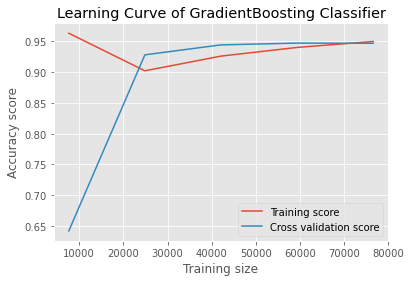

In [91]:
plt.plot(train_sizes, train_mean, label = 'Training score')
plt.plot(train_sizes, test_mean, label = 'Cross validation score')

plt.title('Learning Curve of GradientBoosting Classifier')
plt.xlabel('Training size')
plt.ylabel('Accuracy score')
plt.legend(loc ='best')

In [92]:
train_sizes, train_scores, test_scores = learning_curve(XGBClassifier(), X, Y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))

In [93]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

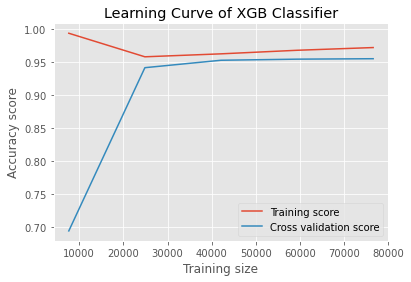

In [94]:
plt.plot(train_sizes, train_mean, label = 'Training score')
plt.plot(train_sizes, test_mean, label = 'Cross validation score')

plt.title('Learning Curve of XGB Classifier')
plt.xlabel('Training size')
plt.ylabel('Accuracy score')
plt.legend(loc ='best')

In [95]:
train_sizes, train_scores, test_scores = learning_curve(XGBRFClassifier(), X, Y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))

In [96]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

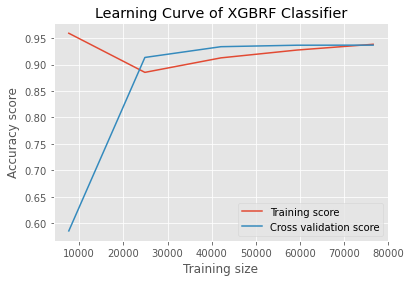

In [97]:
plt.plot(train_sizes, train_mean, label = 'Training score')
plt.plot(train_sizes, test_mean, label = 'Cross validation score')

plt.title('Learning Curve of XGBRF Classifier')
plt.xlabel('Training size')
plt.ylabel('Accuracy score')
plt.legend(loc ='best')

In [98]:
train_sizes, train_scores, test_scores = learning_curve(LGBMClassifier(), X, Y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))

In [99]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

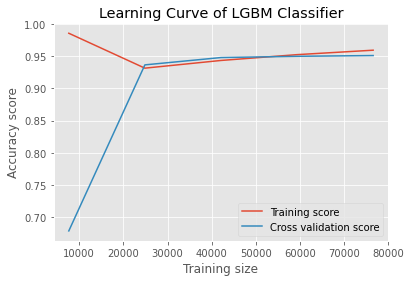

In [100]:
plt.plot(train_sizes, train_mean, label = 'Training score')
plt.plot(train_sizes, test_mean, label = 'Cross validation score')

plt.title('Learning Curve of LGBM Classifier')
plt.xlabel('Training size')
plt.ylabel('Accuracy score')
plt.legend(loc ='best')

In [ ]:
estimator = SVC(gamma=0.001)
train_sizes, train_scores, test_scores = learning_curve(estimator, X_test, y_test, cv=30, scoring='accuracy')

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [ ]:
plt.plot(train_sizes, train_mean, label = 'Training score')
plt.plot(train_sizes, test_mean, label = 'Cross validation score')

plt.title('Learning Curve of SVM')
plt.xlabel('Training size')
plt.ylabel('Accuracy score')
plt.legend(loc ='best')